In [1]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

2023-11-22 17:38:40.175265: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 17:38:40.215838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 17:38:40.215879: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 17:38:40.215910: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 17:38:40.222724: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 17:38:40.223385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
model_uri = '../modelh5/LSTM_FT_KFold_2.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 112, 64)           16896     
                                                                 
 dense_88 (Dense)            (None, 112, 32)           2080      
                                                                 
 flatten_22 (Flatten)        (None, 3584)              0         
                                                                 
 dense_89 (Dense)            (None, 64)                229440    
                                                                 
 dense_90 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_12 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                     

In [3]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
for i in range(1, 13):
  header += f' chroma{i}'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()
file = open('testing_apicta.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)



In [4]:
dataset_path = '../physionet/'

In [5]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                to_append = f'{file_path}'
                y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
                coeffs = wavedec(y, 'db1', level=10)
                cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
                mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
                rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
                cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
                combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
                to_append = f'{file_path}'
                for e in combined_features:
                    to_append += f' {np.mean(e.T, axis=0)}'
                to_append += f' {semantic_label}'
                file = open('testing.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())


In [6]:
data = pd.read_csv('./testing_apicta.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label


In [7]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [8]:
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i) 
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


ValueError: Expected input data to be non-empty.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, hasil)
cm

array([[20,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0,  0, 20,  0,  0],
       [ 0,  0,  1, 19,  0],
       [ 0,  0,  0,  0, 20]])

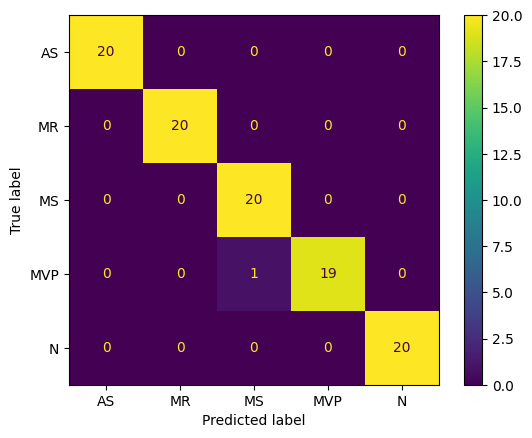

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
print("Sensitivity :" , TPR, 'mean: ', np.mean(TPR))
print("Specificity :" , TNR, 'mean: ', np.mean(TNR))
print("Precision :" , PPV, 'mean: ', np.mean(PPV))
print("Accuracy :" , ACC, 'mean: ', np.mean(ACC))
print("FPR :" , FPR, 'mean: ', np.mean(FPR))
print("FNR :" , FNR, 'mean: ', np.mean(FNR))
print("NPV :" , NPV, 'mean: ', np.mean(NPV))
print("FDR :" , FDR, 'mean: ', np.mean(FDR))
print("f1_score:", 2 * (PPV * TPR) / (PPV + TPR), 'mean: ', np.mean(2 * (PPV * TPR) / (PPV + TPR)))

Sensitivity : [1.   1.   1.   0.95 1.  ] mean:  0.99
Specificity : [1.     1.     0.9875 1.     1.    ] mean:  0.9974999999999999
Precision : [1.         1.         0.95238095 1.         1.        ] mean:  0.9904761904761905
Accuracy : [1.   1.   0.99 0.99 1.  ] mean:  0.9960000000000001
FPR : [0.     0.     0.0125 0.     0.    ] mean:  0.0025
FNR : [0.   0.   0.   0.05 0.  ] mean:  0.01
NPV : [1.         1.         1.         0.98765432 1.        ] mean:  0.9975308641975309
FDR : [0.         0.         0.04761905 0.         0.        ] mean:  0.009523809523809523
f1_score: [1.         1.         0.97560976 0.97435897 1.        ] mean:  0.9899937460913071
